In [3]:
import yfinance as yf
import pandas as pd

In [5]:
data = pd.read_csv("Apple_data.csv")

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.320433,212818400,0.0,0.0
1,2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.635277,257142000,0.0,0.0
2,2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.637506,263188400,0.0,0.0
3,2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,23.968958,160423600,0.0,0.0
4,2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,24.889904,237458000,0.0,0.0


In [7]:
data.shape

(2516, 9)

In [8]:
df1 = data.reset_index()['Close']

In [9]:
df1

0        27.332500
1        26.562500
2        26.565001
3        26.937500
4        27.972500
           ...    
2511    258.200012
2512    259.019989
2513    255.589996
2514    252.199997
2515    250.419998
Name: Close, Length: 2516, dtype: float64

In [10]:
import numpy as np

In [11]:
training_size = int(len(df1)*0.8)
train_data = df1[:training_size]
test_data = df1[training_size:]

In [12]:
train_data.shape

(2012,)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data_scaled = scaler.transform(np.array(test_data).reshape(-1, 1))

In [14]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
time_step = 150
X_train, y_train = create_dataset(train_data_scaled, time_step)
X_test, ytest = create_dataset(test_data_scaled, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1862, 150)
(1862,)


(None, None)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Input,  Dropout

In [22]:
import tensorflow as tf

In [23]:
model = Sequential()

# Explicitly define input shape for new time step (150 instead of 100)
model.add(Input(shape=(150, 1)))  

# Add LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Show model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 150, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 150, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, ytest), 
                    epochs=100, batch_size=64, verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - loss: 0.0517 - val_loss: 0.0323
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - loss: 0.0041 - val_loss: 0.0242
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 0.0030 - val_loss: 0.0161
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.0033 - val_loss: 0.0167
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 0.0029 - val_loss: 0.0124
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - loss: 0.0027 - val_loss: 0.0051
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 0.0028 - val_loss: 0.0122
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - loss: 0.0024 - val_loss: 0.0089
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 0.0029 - val_loss: 0.0118
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(ytest.reshape(-1, 1))

In [30]:
rmse_train = np.sqrt(mean_squared_error(y_train_actual, train_predict))
rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_predict))
mae_train = mean_absolute_error(y_train_actual, train_predict)
mae_test = mean_absolute_error(y_test_actual, test_predict)

In [31]:
print(f"Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")
print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")

Train RMSE: 14289.432796322468, Test RMSE: 30509.542892654536
Train MAE: 12057.04072706323, Test MAE: 30350.180192634885


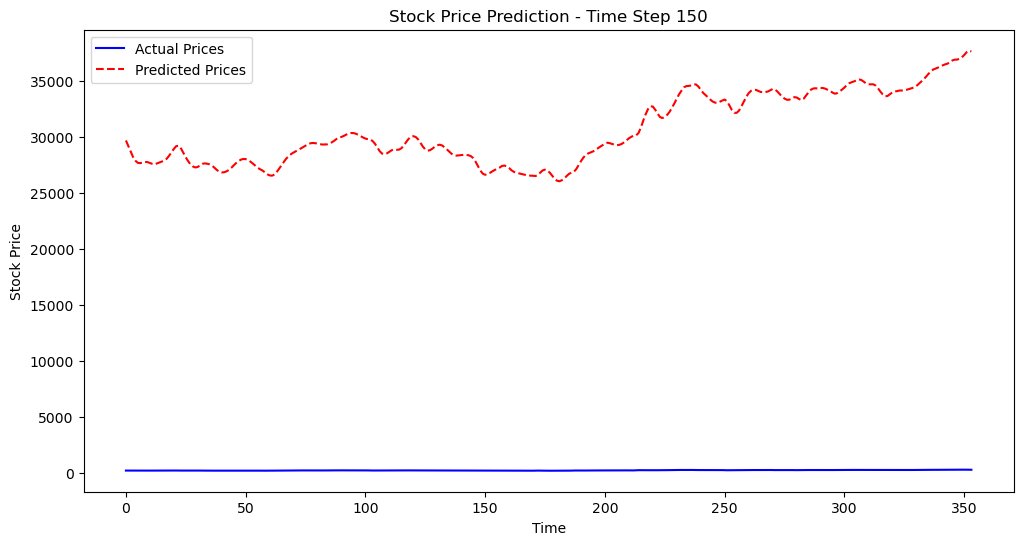

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(test_predict, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title(f"Stock Price Prediction - Time Step {time_step}")
plt.show()